# **Proyecto 2 - Entrega 1: Modelos de Regresión Lineal**  

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

---

##  **INSTRUCCIONES**  
Utilice el data set House Prices: Advanced Regression Techniques. Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final es predecir los precios de las casas. Recuerde explicar bien cada uno de los hallazgos que haga. La forma más organizada de hacer un análisis exploratorio es generando ciertas preguntas de las líneas que le parece interesante investigar. Genere un informe con las explicaciones de los
pasos que llevó a cabo y los resultados obtenidos. Recuerde que la investigación debe ser reproducible por lo que debe guardar el código que ha utilizado para resolver los ejercicios.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Ahora observaremos la data con la que contamos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Revisión Inicial de Datos

- **Dimensiones del dataset:**  
  El conjunto de datos consta de 1460 registros y 81 columnas, lo que nos permite trabajar con una cantidad moderada de observaciones y múltiples atributos para analizar.

- **Tipos de variables:**  
  Se observa una mezcla de variables numéricas y categóricas. Esto indica que el dataset incluye datos cuantitativos (como áreas, precios y medidas) y cualitativos (como vecindarios, tipos de calle y materiales de construcción).

- **Presencia de valores nulos:**  
  Algunas columnas presentan valores faltantes, lo cual es común en datasets reales. En particular, variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de datos ausentes. Es necesario identificar la causa de estas ausencias y decidir si se imputan o se eliminan estas columnas, según su relevancia en el modelo.

- **Variables categóricas:**  
  Las columnas de tipo categórico representan atributos descriptivos importantes, tales como el vecindario, el tipo de calle, y los materiales de construcción. Estos atributos pueden ser fundamentales para capturar diferencias en la calidad y el valor de las propiedades, por lo que su correcta codificación e interpretación es esencial para construir modelos de regresión robustos.


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##  **Análisis Descriptivo de los Datos**  

El análisis descriptivo nos permite explorar las distribuciones y características de las variables numéricas clave en el dataset.  

###  **Distribución de Variables Numéricas**  
Algunas variables presentan una amplia dispersión en sus valores, lo que indica una gran variabilidad en las características de las propiedades:  

- ** Tamaño del lote (`LotArea`)**:  
  - Representa el área total del terreno de cada vivienda.  
  - Tiene un amplio rango de valores, lo que sugiere que las propiedades varían significativamente en tamaño.  

- ** Área habitable sobre nivel del suelo (`GrLivArea`)**:  
  - Indica el espacio habitable de la casa (excluyendo sótanos).  
  - Presenta una distribución sesgada hacia la derecha, con algunas viviendas mucho más grandes que el promedio.  

- ** Precio de venta (`SalePrice`)**:  
  - **Valor mínimo:** 34,900  
  - **Valor máximo:** 755,000  
  - **Distribución:** Asimétrica, con la mayoría de los precios concentrados en rangos más bajos y algunas propiedades muy costosas actuando como valores atípicos.  

###  **Variables con Valores Mayoritariamente Cero**  
Algunas variables contienen valores de **cero en la mayoría de los registros**, lo que indica que la característica correspondiente es poco común en el dataset:  

- ** `PoolArea` (Área de piscina):**  
  - La mayoría de las viviendas no tienen piscina, lo que sugiere que esta variable tiene poco impacto en la predicción de precios.  

Este análisis nos permite identificar posibles **valores atípicos**, entender la distribución de las variables y evaluar cuáles podrían requerir transformaciones para mejorar el rendimiento de los modelos de regresión.  



In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


## Análisis de Valores Nulos  

Uno de los pasos fundamentales en la limpieza de datos es identificar y manejar los valores nulos, ya que pueden afectar la precisión y el rendimiento de los modelos de regresión.  

### Variables con Alto Porcentaje de Valores Nulos  
Algunas columnas contienen más del 50% de valores faltantes, lo que indica que tienen muy poca información relevante. Entre ellas se encuentran:  

- **PoolQC (Calidad de la piscina)**  
  - Más del 99% de los valores están ausentes.  
  - La mayoría de las viviendas no tienen piscina, por lo que esta variable aporta poco a la predicción del precio.  

- **MiscFeature (Características misceláneas como cobertizos o ascensores)**  
  - Más del 96% de los valores son nulos.  
  - Representa características poco comunes que probablemente no tengan un gran impacto en el precio de la vivienda.  

- **Alley (Tipo de acceso trasero o callejón)**  
  - Más del 93% de los valores están ausentes.  
  - Muchas viviendas no tienen acceso trasero a un callejón, lo que explica la alta cantidad de valores nulos.  

### Variables Numéricas con Algunos Valores Nulos  
Existen algunas variables numéricas importantes con valores faltantes que deben ser tratados adecuadamente:  

- **MasVnrArea (Área de revestimiento de mampostería)**  
  - Algunos valores nulos indican que la vivienda no tiene revestimiento de mampostería.  
  - Se puede imputar con cero en estos casos.  

- **GarageYrBlt (Año de construcción del garaje)**  
  - Algunas casas no tienen garaje, lo que explica los valores faltantes.  
  - Se puede reemplazar con "0" o con el año de construcción de la vivienda.  


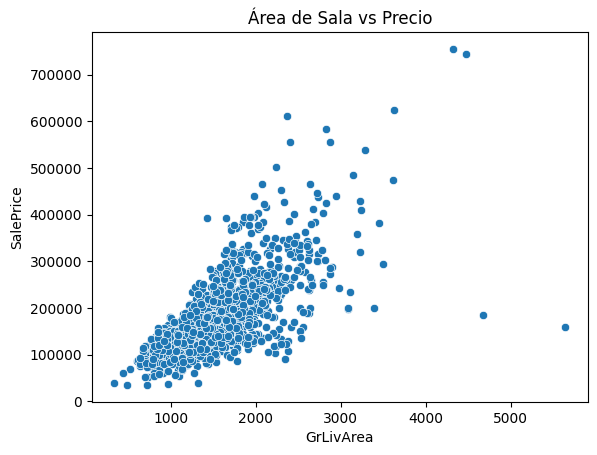

In [7]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Área de Sala vs Precio')
plt.show()

## Relación entre Área Habitable y Precio (GrLivArea vs SalePrice)  

Se observa una relación positiva entre el área habitable (`GrLivArea`) y el precio de venta (`SalePrice`): a mayor área, mayor precio.  

Sin embargo, existen algunos valores atípicos, principalmente casas muy grandes con precios anormalmente bajos. Estos outliers pueden afectar el rendimiento del modelo, por lo que se recomienda analizarlos y considerar su eliminación.  


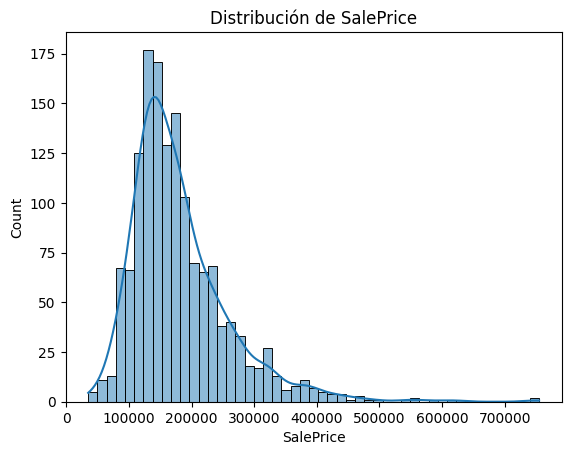

In [8]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.show()

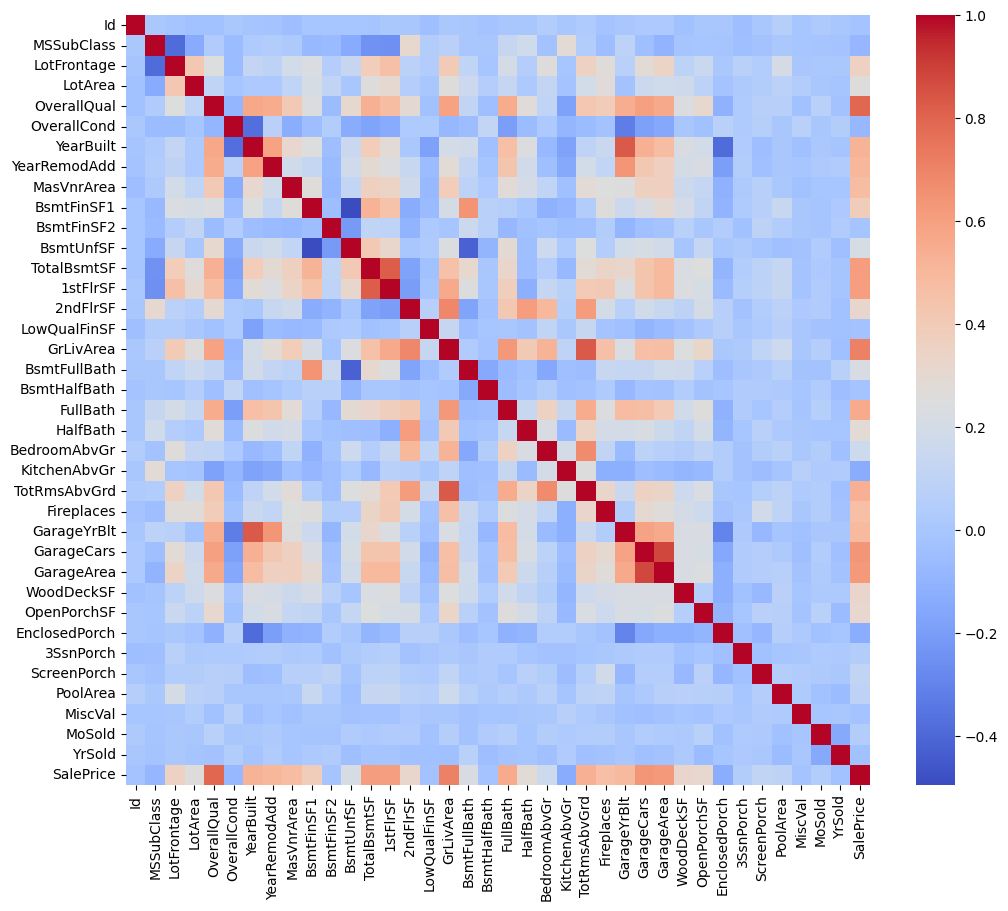

In [9]:

df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


## Matriz de Correlación  

Las variables con mayor correlación con el precio de venta (`SalePrice`) son:  
- **OverallQual** (calidad general de la vivienda)  
- **GrLivArea** (área habitable sobre el nivel del suelo)  
- **GarageCars** (cantidad de autos que caben en el garaje)  

Por otro lado, variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen una correlación cercana a cero, lo que indica que no son relevantes para predecir el precio.  

Este análisis es clave para la selección de variables, permitiendo enfocarse en aquellas que realmente impactan en el modelo de regresión.  


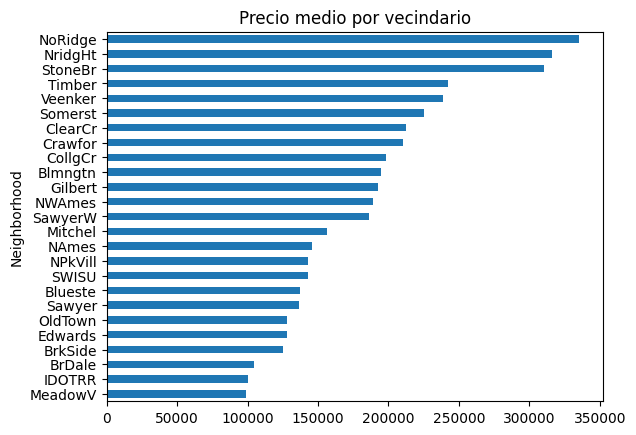

In [10]:
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot(kind='barh')
plt.title('Precio medio por vecindario')
plt.show()

## Precio Promedio por Vecindario  

Existe una clara diferencia de precios según la ubicación de la vivienda.  

- **Vecindarios con precios más altos:** `NoRidge`, `StoneBr`  
- **Vecindarios más económicos:** `MeadowV`  

Esto confirma que `Neighborhood` es una variable clave en la predicción del precio de venta. En el preprocesamiento, se recomienda convertir esta variable en **dummies** para su uso en el modelo de regresión.  


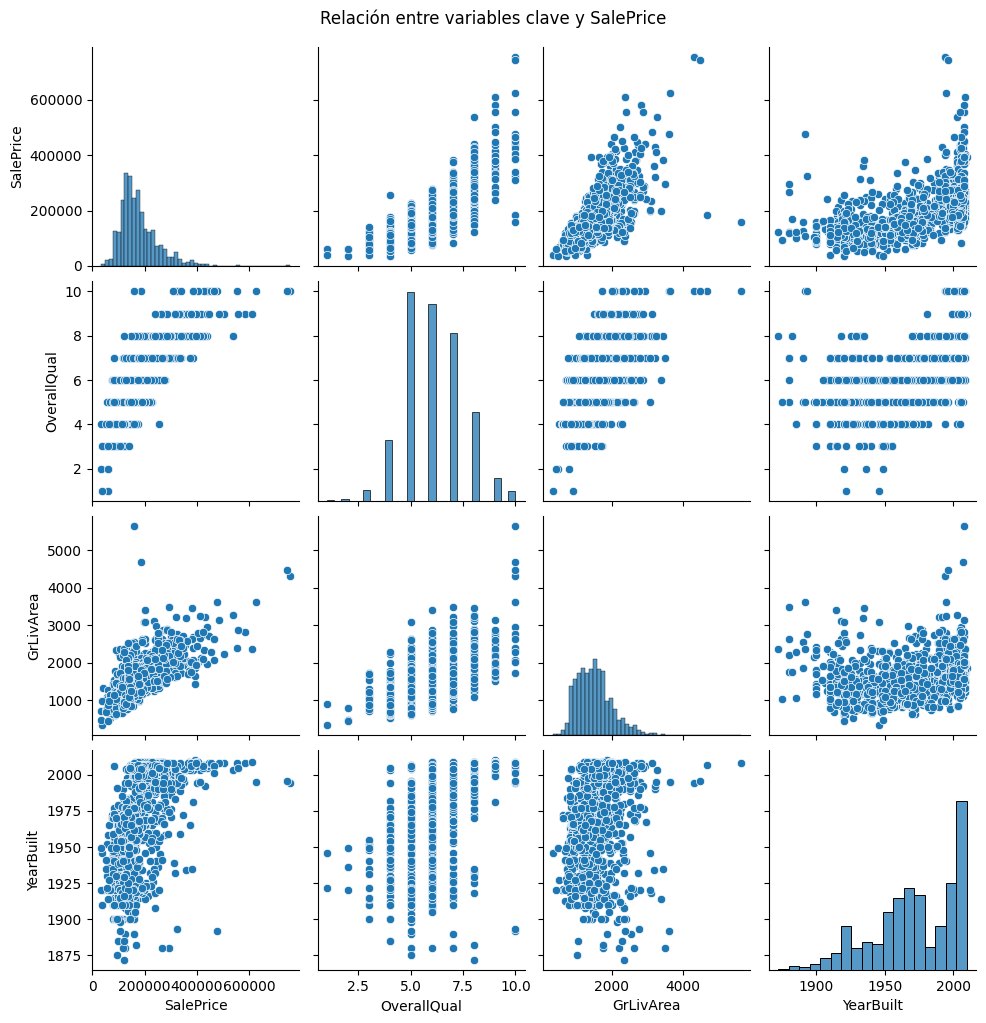

In [11]:
sns.pairplot(df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt'])
plt.suptitle('Relación entre variables clave y SalePrice', y=1.02)
plt.show()


## Pairplot: Relación entre Variables Clave y SalePrice  

Se observa una relación positiva entre `SalePrice` y las siguientes variables:  

- **OverallQual:** A mayor calidad general de la vivienda, mayor es el precio.  
- **GrLivArea:** Casas con mayor área habitable tienden a tener precios más altos.  
- **YearBuilt:** Las casas más nuevas suelen ser más costosas.  

Además, hay algunos outliers, especialmente viviendas muy grandes con precios anormalmente bajos, que podrían afectar el modelo y deben ser analizados.  


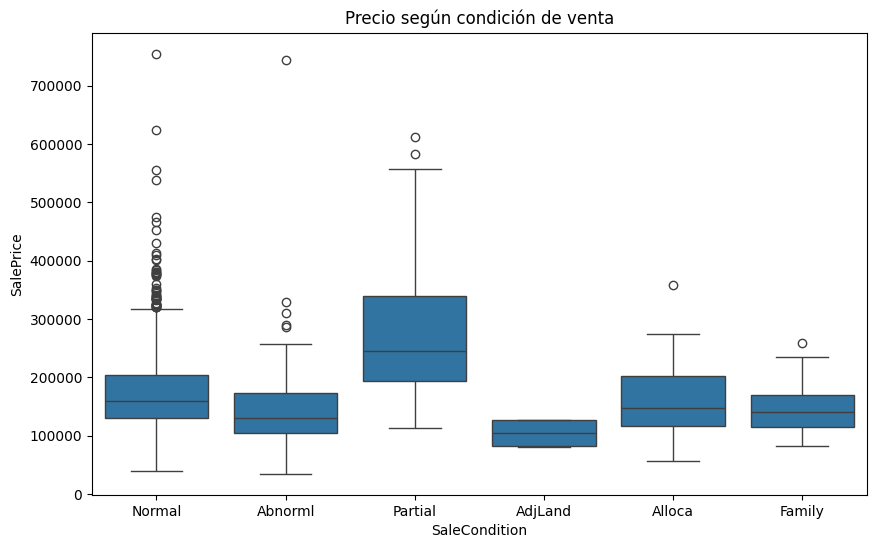

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.title('Precio según condición de venta')
plt.show()

## Boxplot: Precio según Condición de Venta  

El análisis muestra diferencias en la distribución de precios según la condición de venta (`SaleCondition`):  

- **Normal:** Presenta una distribución de precios más estable y amplia.  
- **Partial:** Tiende a tener precios más altos, posiblemente porque corresponde a casas nuevas o remodeladas.  
- **Abnorml:** Generalmente muestra precios más bajos, lo que podría estar relacionado con ventas forzadas o condiciones especiales.  

Se identifican varios outliers en cada categoría, especialmente en `Normal` y `Partial`, lo que sugiere la necesidad de revisar su impacto en el modelo.  


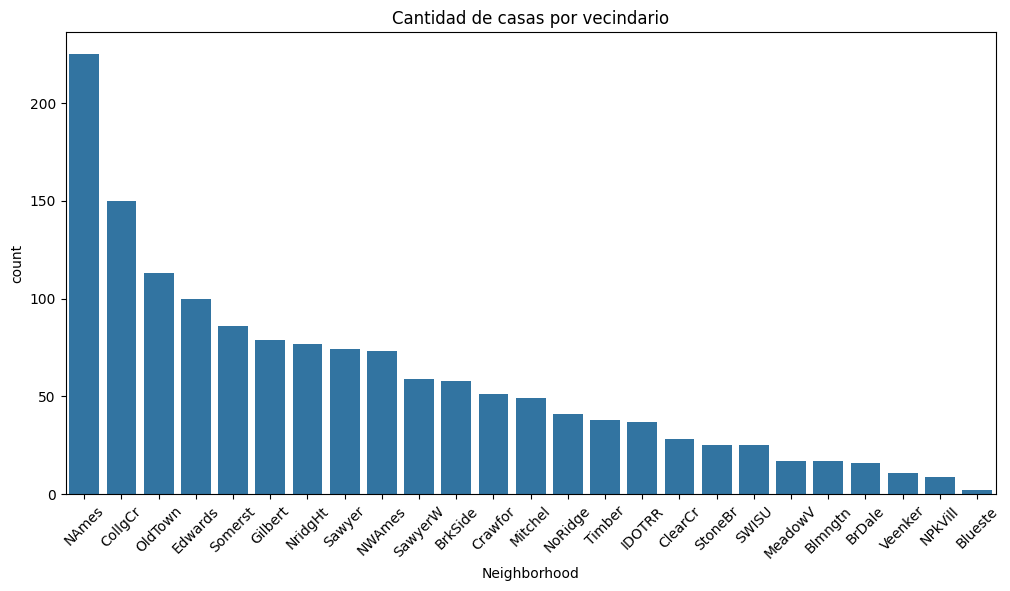

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de casas por vecindario')
plt.show()


## Countplot: Cantidad de Casas por Vecindario  

El número de viviendas varía significativamente entre vecindarios:  

- **NAmes** es el vecindario con más casas registradas, seguido por **CollgCr** y **OldTown**.  
- **MeadowV** y **Blueste** tienen muy pocas viviendas en el dataset.  

Esto sugiere que algunos vecindarios aportan mucha más información al modelo que otros. En el preprocesamiento, se debe evaluar si los vecindarios con pocas casas son relevantes o si es conveniente agruparlos o eliminarlos para mejorar la estabilidad del modelo.  


# **Conclusiones Finales - Primera Entrega (Avances)**  

En esta primera fase, se realizó un análisis exploratorio detallado del dataset inmobiliario proporcionado por Kaggle, identificando patrones clave y aspectos críticos que influirán en la construcción del modelo de regresión lineal. A continuación, se presentan los hallazgos más relevantes:  

###  **Estructura y Calidad de los Datos**  
- El dataset cuenta con **1,460 registros y 81 columnas**, proporcionando una base de datos amplia y detallada.  
- Se identificaron variables con un alto porcentaje de valores nulos, como `PoolQC`, `MiscFeature` y `Alley`, que deberán ser analizadas para determinar si se eliminan o si se imputan.  

###  **Distribución del Precio de Venta (`SalePrice`)**  
- Presenta una **distribución sesgada positivamente**, con una larga cola hacia precios altos.  
- Esto sugiere que podría ser beneficioso aplicar una **transformación logarítmica** para mejorar la linealidad y el rendimiento del modelo.  

###  **Variables Más Relevantes para el Modelo**  
- Se identificó que **OverallQual, GrLivArea y GarageCars** tienen la mayor correlación con el precio de venta.  
- Esto indica que la **calidad de construcción, el área habitable y la capacidad del garaje** son factores clave para estimar el valor de una vivienda.  

###  **Impacto del Vecindario en los Precios**  
- Existen diferencias significativas en los precios según la ubicación.  
- Vecindarios como **NoRidge y StoneBr** presentan precios notablemente más altos, mientras que **MeadowV** es una de las zonas más económicas.  
- Esto confirma que la **ubicación geográfica es una variable esencial** en la predicción del precio de las viviendas.  

###  **Condición de Venta y su Relación con el Precio**  
- La mayoría de las ventas corresponden a la condición **Normal**, con una amplia dispersión de precios.  
- Las ventas **Partial** (posiblemente casas nuevas o remodeladas) tienden a tener precios más altos.  
- Las ventas con condición **Abnorml** generalmente presentan precios más bajos, lo que puede estar relacionado con ventas forzadas o condiciones especiales.  

###  **Presencia de Outliers**  
- Se detectaron valores atípicos, principalmente **casas con áreas habitables excepcionalmente grandes y precios anormalmente bajos**.  
- Estos outliers deberán ser analizados y tratados cuidadosamente, ya que pueden distorsionar el modelo de regresión.  

###  **Recomendaciones para el Preprocesamiento**  
Para garantizar un modelo preciso y robusto, será necesario aplicar un **preprocesamiento adecuado**, que incluya:  
✔ **Manejo de valores nulos** mediante imputación o eliminación.  
✔ **Transformaciones de variables** para mejorar la distribución y la linealidad.  
✔ **Codificación de variables categóricas**, especialmente `Neighborhood` y `SaleCondition`.  
✔ **Tratamiento de outliers** para evitar sesgos en el modelo.  

###  **Próximos Pasos**  
Con esta base de análisis, el siguiente paso será la preparación del dataset para la implementación del modelo de regresión lineal, asegurando que todas las variables estén correctamente tratadas y optimizadas para obtener predicciones precisas.  
